In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from shapely import wkt
import os



In [4]:
pip install requests shapely


Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
from shapely.geometry import LineString

# Lista de las coordenadas (de abajo hacia arriba)
locations = [
    (14.9039, -92.2575),  # Tapachula, Chiapas
    (16.23533326, -93.8967426),  # Arriaga, Chiapas
    (16.436, -95.0148),  # Juchitán, Oaxaca
    (17.879, -94.947),  # Sayula de Alemán, Veracruz
    (19.4285, -99.1277),  # Ciudad de México
    (20.5881, -100.3881),  # Santiago de Querétaro
    (20.6668, -103.3918),  # Guadalajara, Jalisco
    (22.84, -105.7822),  # Escuinapa, Sinaloa
    (27.0704, -109.443),  # Navojoa, Sonora
    (32.5027, -117.0037)  # Tijuana, Baja California
]

# Servidor público de OSRM
osrm_base_url = "http://router.project-osrm.org/route/v1/driving"

# Función para obtener direcciones entre dos puntos usando OSRM
def get_directions_osrm(start, end):
    # Prepara la solicitud con las coordenadas invertidas (lon, lat)
    coordinates = f"{start[1]},{start[0]};{end[1]},{end[0]}"
    
    # Solicita la ruta a OSRM
    response = requests.get(f"{osrm_base_url}/{coordinates}?overview=full&geometries=geojson")
    
    # Si la solicitud es exitosa, extrae la geometría (coordinates) de la respuesta
    if response.status_code == 200:
        route = response.json()['routes'][0]['geometry']['coordinates']
        return LineString(route)  # Retorna las coordenadas como LineString
    else:
        print(f"Error: {response.status_code}")
        return None

# Genera la ruta completa desde Tapachula a Tijuana
full_route = []
for i in range(len(locations) - 1):
    start = locations[i]
    end = locations[i + 1]
    line_segment = get_directions_osrm(start, end)
    if line_segment:
        full_route.append(line_segment)

# Unir todos los segmentos de la ruta en un solo LineString
complete_route = LineString([coord for segment in full_route for coord in segment.coords])

# Mostrar la LineString completa
print(complete_route)


LINESTRING (-92.257282 14.903799, -92.257795 14.902769, -92.258046 14.902935, -92.258679 14.903354, -92.259521 14.90394, -92.26041 14.904504, -92.260865 14.904822, -92.260983 14.904905, -92.261639 14.905331, -92.262529 14.905923, -92.262623 14.905985, -92.262822 14.906111, -92.263221 14.906372, -92.263429 14.906508, -92.264345 14.907101, -92.265177 14.907638, -92.265844 14.908064, -92.266424 14.908405, -92.26692 14.90875, -92.267698 14.909157, -92.267851 14.909251, -92.267954 14.909303, -92.26802 14.909377, -92.268075 14.909463, -92.268137 14.909574, -92.268256 14.909765, -92.26849 14.909925, -92.269326 14.910272, -92.269559 14.910367, -92.270067 14.910549, -92.270288 14.91063, -92.270895 14.91087, -92.271186 14.910976, -92.271275 14.911014, -92.271933 14.91127, -92.27204 14.911311, -92.272132 14.911344, -92.272317 14.911416, -92.273005 14.911672, -92.273677 14.911951, -92.273872 14.912058, -92.273988 14.91215, -92.274225 14.912243, -92.274421 14.912352, -92.27447 14.912244, -92.274744

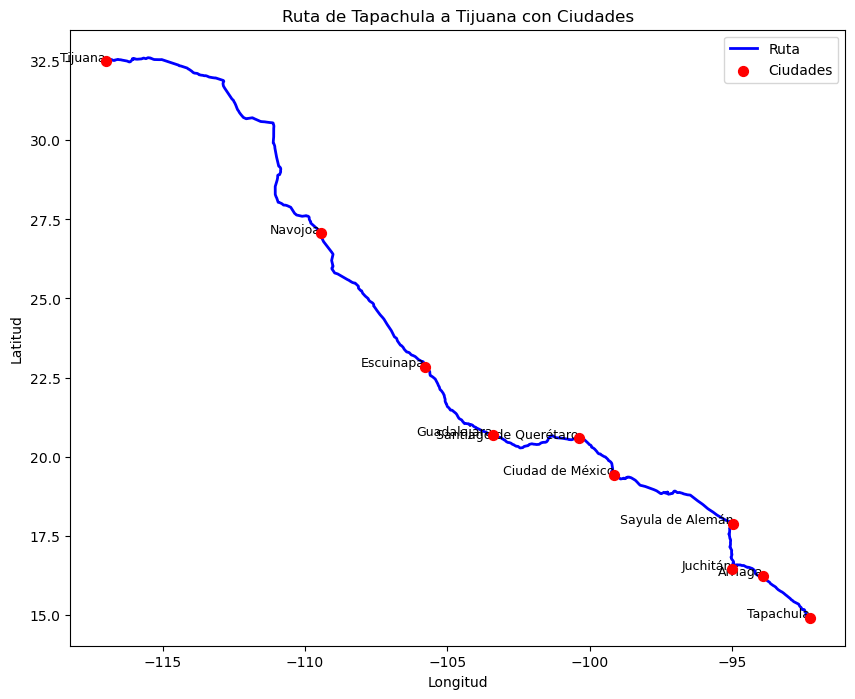

In [6]:
import requests
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point

# Lista de las ciudades con sus coordenadas (de abajo hacia arriba)
cities = [
    {"name": "Tapachula", "coords": (14.9039, -92.2575)},  # Tapachula, Chiapas
    {"name": "Arriaga", "coords": (16.23533326, -93.8967426)},  # Arriaga, Chiapas
    {"name": "Juchitán", "coords": (16.436, -95.0148)},  # Juchitán, Oaxaca
    {"name": "Sayula de Alemán", "coords": (17.879, -94.947)},  # Sayula de Alemán, Veracruz
    {"name": "Ciudad de México", "coords": (19.4285, -99.1277)},  # Ciudad de México
    {"name": "Santiago de Querétaro", "coords": (20.5881, -100.3881)},  # Santiago de Querétaro
    {"name": "Guadalajara", "coords": (20.6668, -103.3918)},  # Guadalajara, Jalisco
    {"name": "Escuinapa", "coords": (22.84, -105.7822)},  # Escuinapa, Sinaloa
    {"name": "Navojoa", "coords": (27.0704, -109.443)},  # Navojoa, Sonora
    {"name": "Tijuana", "coords": (32.5027, -117.0037)}  # Tijuana, Baja California
]

# Servidor público de OSRM
osrm_base_url = "http://router.project-osrm.org/route/v1/driving"

# Función para obtener direcciones entre dos puntos usando OSRM
def get_directions_osrm(start, end):
    # Prepara la solicitud con las coordenadas invertidas (lon, lat)
    coordinates = f"{start[1]},{start[0]};{end[1]},{end[0]}"
    
    # Solicita la ruta a OSRM
    response = requests.get(f"{osrm_base_url}/{coordinates}?overview=full&geometries=geojson")
    
    # Si la solicitud es exitosa, extrae la geometría (coordinates) de la respuesta
    if response.status_code == 200:
        route = response.json()['routes'][0]['geometry']['coordinates']
        return LineString(route)  # Retorna las coordenadas como LineString
    else:
        print(f"Error: {response.status_code}")
        return None

# Genera la ruta completa desde Tapachula a Tijuana
full_route = []
for i in range(len(cities) - 1):
    start = cities[i]["coords"]
    end = cities[i + 1]["coords"]
    line_segment = get_directions_osrm(start, end)
    if line_segment:
        full_route.append(line_segment)

# Unir todos los segmentos de la ruta en un solo LineString
complete_route = LineString([coord for segment in full_route for coord in segment.coords])

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Plotear la ruta (LineString)
x, y = complete_route.xy
ax.plot(x, y, color='blue', linewidth=2, label="Ruta")

# Plotear los puntos de las ciudades
city_coords = [city["coords"] for city in cities]
city_names = [city["name"] for city in cities]

# Extraer las coordenadas de las ciudades (latitud y longitud)
city_lats = [city[0] for city in city_coords]
city_lons = [city[1] for city in city_coords]

# Añadir los puntos de las ciudades al gráfico
ax.scatter(city_lons, city_lats, color='red', s=50, zorder=5, label="Ciudades")

# Añadir etiquetas a cada ciudad
for i, city in enumerate(city_names):
    ax.text(city_lons[i], city_lats[i], city, fontsize=9, ha='right')

# Etiquetas y título del gráfico
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_title("Ruta de Tapachula a Tijuana con Ciudades")

# Mostrar leyenda
ax.legend()

# Mostrar gráfico
plt.show()


In [7]:
import os
import fiona
from fiona.crs import from_epsg
from shapely.geometry import mapping, Point, LineString

# Definir el directorio donde se guardarán los archivos shapefiles
output_dir = r"C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\caravanas"

# Asegurarse de que el directorio exista, si no, crearlo
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Lista de las ciudades con sus coordenadas (de abajo hacia arriba)
cities = [
    {"name": "Tapachula", "coords": (14.9039, -92.2575)},  # Tapachula, Chiapas
    {"name": "Arriaga", "coords": (16.23533326, -93.8967426)},  # Arriaga, Chiapas
    {"name": "Juchitán", "coords": (16.436, -95.0148)},  # Juchitán, Oaxaca
    {"name": "Sayula de Alemán", "coords": (17.879, -94.947)},  # Sayula de Alemán, Veracruz
    {"name": "Ciudad de México", "coords": (19.4285, -99.1277)},  # Ciudad de México
    {"name": "Santiago de Querétaro", "coords": (20.5881, -100.3881)},  # Santiago de Querétaro
    {"name": "Guadalajara", "coords": (20.6668, -103.3918)},  # Guadalajara, Jalisco
    {"name": "Escuinapa", "coords": (22.84, -105.7822)},  # Escuinapa, Sinaloa
    {"name": "Navojoa", "coords": (27.0704, -109.443)},  # Navojoa, Sonora
    {"name": "Tijuana", "coords": (32.5027, -117.0037)}  # Tijuana, Baja California
]

# Función para escribir un shapefile de puntos (ciudades)
def save_cities_shapefile(output_dir, cities):
    # Definir la ruta del shapefile de ciudades
    shp_file_path = os.path.join(output_dir, "ciudades.shp")
    
    # Especificar el esquema del shapefile
    schema = {
        'geometry': 'Point',
        'properties': {'name': 'str'}
    }
    
    # Definir el sistema de coordenadas WGS84 (EPSG:4326)
    crs = from_epsg(4326)
    
    # Crear el shapefile de puntos
    with fiona.open(shp_file_path, 'w', driver='ESRI Shapefile', schema=schema, crs=crs) as shp:
        for city in cities:
            point = Point(city["coords"][1], city["coords"][0])  # Longitud, Latitud
            shp.write({
                'geometry': mapping(point),
                'properties': {'name': city['name']}
            })
    print(f"Shapefile de ciudades guardado en: {shp_file_path}")

# Función para escribir un shapefile de líneas (ruta)
def save_route_shapefile(output_dir, route):
    # Definir la ruta del shapefile de la ruta
    shp_file_path = os.path.join(output_dir, "ruta.shp")
    
    # Especificar el esquema del shapefile
    schema = {
        'geometry': 'LineString',
        'properties': {'name': 'str'}
    }
    
    # Definir el sistema de coordenadas WGS84 (EPSG:4326)
    crs = from_epsg(4326)
    
    # Crear el shapefile de la ruta
    with fiona.open(shp_file_path, 'w', driver='ESRI Shapefile', schema=schema, crs=crs) as shp:
        shp.write({
            'geometry': mapping(route),
            'properties': {'name': 'Ruta Caravanas'}
        })
    print(f"Shapefile de la ruta guardado en: {shp_file_path}")

# Generar la ruta completa como LineString usando coordenadas de ciudades
city_coords = [city["coords"] for city in cities]
complete_route = LineString([(lon, lat) for lat, lon in city_coords])  # Lon, Lat para LineString

# Guardar shapefiles de ciudades y ruta
save_cities_shapefile(output_dir, cities)
save_route_shapefile(output_dir, complete_route)


Shapefile de ciudades guardado en: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\caravanas\ciudades.shp
Shapefile de la ruta guardado en: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\caravanas\ruta.shp


C:\Users\puria\AppData\Local\Temp\ipykernel_2316\535299612.py:78: FionaDeprecationWarning: This function will be removed in version 2.0. Please use CRS.from_epsg() instead.
  save_cities_shapefile(output_dir, cities)
C:\Users\puria\AppData\Local\Temp\ipykernel_2316\535299612.py:79: FionaDeprecationWarning: This function will be removed in version 2.0. Please use CRS.from_epsg() instead.
  save_route_shapefile(output_dir, complete_route)


In [8]:
import os
import fiona
from fiona.crs import from_epsg
from shapely.geometry import mapping, Point, LineString

# Definir el directorio donde se guardarán los archivos shapefiles
output_dir = r"C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\caravanas"

# Asegurarse de que el directorio exista, si no, crearlo
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Lista de las ciudades con sus coordenadas (de abajo hacia arriba)
cities = [
    {"name": "Ciudad Hidalgo", "coords": (14.6797, -92.1524)},  # Ciudad Hidalgo, Chiapas
    {"name": "Tapachula", "coords": (14.9039, -92.2575)},  # Tapachula, Chiapas
    {"name": "Metapa de Domínguez", "coords": (14.8325, -92.1739)},  # Metapa de Domínguez, Chiapas
    {"name": "Huixtla", "coords": (15.1441, -92.4708)},  # Huixtla, Chiapas
    {"name": "Tonalá", "coords": (16.0866, -93.7552)},  # Tonalá, Chiapas
    {"name": "Arriaga", "coords": (16.23533326, -93.8967426)},  # Arriaga, Chiapas
    {"name": "Chahuites", "coords": (16.29297976, -94.19317596)},  # Chahuites, Oaxaca
    {"name": "Los Mangos", "coords": (17.31352987, -96.68384252)},  # Los Mangos, Oaxaca
    {"name": "Tanatepec", "coords": (16.5786, -94.7833)},  # Tanatepec, Oaxaca
    {"name": "Santo Domingo Ingenio", "coords": (16.5331, -94.6861)},  # Santo Domingo Ingenio, Oaxaca
    {"name": "Ixtepec", "coords": (16.5669, -95.0947)},  # Ixtepec, Oaxaca
    {"name": "Matías Romero", "coords": (16.8747, -95.0411)},  # Matías Romero, Oaxaca
    {"name": "Palomares", "coords": (17.13850449, -95.06226388)},  # Palomares, Oaxaca
    {"name": "Sayula", "coords": (17.879, -94.947)},  # Sayula, Veracruz
    {"name": "Isla", "coords": (18.0403, -95.5319)},  # Isla, Veracruz
    {"name": "Tierra Blanca", "coords": (18.4511, -96.3589)},  # Tierra Blanca, Veracruz
    {"name": "La Tinaja", "coords": (18.682, -96.712)},  # La Tinaja, Veracruz
    {"name": "Orizaba", "coords": (18.8516, -97.1015)},  # Orizaba, Veracruz
    {"name": "Puebla", "coords": (19.0414, -98.2063)},  # Puebla, Puebla
    {"name": "Ciudad de México", "coords": (19.4285, -99.1277)},  # Ciudad de México
    {"name": "Naucalpan", "coords": (19.4785, -99.2396)},  # Naucalpan, Estado de México
    {"name": "Santiago de Querétaro", "coords": (20.5881, -100.3881)},  # Santiago de Querétaro
    {"name": "San Luis Potosí", "coords": (22.1566, -100.9855)},  # San Luis Potosí, SLP
    {"name": "Matehuala", "coords": (23.6533, -100.643)},  # Matehuala, SLP
    {"name": "Saltillo", "coords": (25.4232, -101.0053)},  # Saltillo, Coahuila
    {"name": "Piedras Negras", "coords": (28.7056, -100.5247)}  # Piedras Negras, Coahuila
]

# Función para escribir un shapefile de puntos (ciudades)
def save_cities_shapefile(output_dir, cities):
    # Definir la ruta del shapefile de ciudades
    shp_file_path = os.path.join(output_dir, "ciudades.shp")
    
    # Especificar el esquema del shapefile
    schema = {
        'geometry': 'Point',
        'properties': {'name': 'str'}
    }
    
    # Definir el sistema de coordenadas WGS84 (EPSG:4326)
    crs = from_epsg(4326)
    
    # Crear el shapefile de puntos
    with fiona.open(shp_file_path, 'w', driver='ESRI Shapefile', schema=schema, crs=crs) as shp:
        for city in cities:
            point = Point(city["coords"][1], city["coords"][0])  # Longitud, Latitud
            shp.write({
                'geometry': mapping(point),
                'properties': {'name': city['name']}
            })
    print(f"Shapefile de ciudades guardado en: {shp_file_path}")

# Función para escribir un shapefile de líneas (ruta)
def save_route_shapefile(output_dir, route):
    # Definir la ruta del shapefile de la ruta
    shp_file_path = os.path.join(output_dir, "ruta.shp")
    
    # Especificar el esquema del shapefile
    schema = {
        'geometry': 'LineString',
        'properties': {'name': 'str'}
    }
    
    # Definir el sistema de coordenadas WGS84 (EPSG:4326)
    crs = from_epsg(4326)
    
    # Crear el shapefile de la ruta
    with fiona.open(shp_file_path, 'w', driver='ESRI Shapefile', schema=schema, crs=crs) as shp:
        shp.write({
            'geometry': mapping(route),
            'properties': {'name': 'Ruta Caravanas'}
        })
    print(f"Shapefile de la ruta guardado en: {shp_file_path}")

# Generar la ruta completa como LineString usando coordenadas de ciudades
city_coords = [city["coords"] for city in cities]
complete_route = LineString([(lon, lat) for lat, lon in city_coords])  # Lon, Lat para LineString

# Guardar shapefiles de ciudades y ruta
save_cities_shapefile(output_dir, cities)
save_route_shapefile(output_dir, complete_route)


Shapefile de ciudades guardado en: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\caravanas\ciudades.shp
Shapefile de la ruta guardado en: C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\Visuales\\caravanas\ruta.shp


C:\Users\puria\AppData\Local\Temp\ipykernel_2316\3185931775.py:94: FionaDeprecationWarning: This function will be removed in version 2.0. Please use CRS.from_epsg() instead.
  save_cities_shapefile(output_dir, cities)
C:\Users\puria\AppData\Local\Temp\ipykernel_2316\3185931775.py:95: FionaDeprecationWarning: This function will be removed in version 2.0. Please use CRS.from_epsg() instead.
  save_route_shapefile(output_dir, complete_route)


In [4]:
pd.set_option('display.max_columns', None)

In [11]:
grid = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun\\grid\\grideventos.shp')

In [12]:
grid

,ID_Poligon,eventos202,eventos2_1,eventos2_2,eventos2_3,eventos2_4,porcentaje,porcenta_1,porcenta_2,porcenta_3,porcenta_4,geometry
0,PG1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-120.00000 10.00000, -119.30000 10.0..."
1,PG2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-120.00000 10.70000, -119.30000 10.7..."
2,PG3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-120.00000 11.40000, -119.30000 11.4..."
3,PG4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-120.00000 12.10000, -119.30000 12.1..."
4,PG5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-120.00000 12.80000, -119.30000 12.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2208,PG2141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-82.20000 33.80000, -81.50000 33.800..."
2209,PG2142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-82.20000 34.50000, -81.50000 34.500..."
2210,PG2143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-82.20000 35.20000, -81.50000 35.200..."
2211,PG2144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-82.20000 35.90000, -81.50000 35.900..."


In [10]:
top2020 = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun\\top10mun_2020.shp')
top2021 = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun\\top10mun_2021.shp')
top2022 = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun\\top10mun_2022.shp')
top2023 = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun\\top10mun_2023.shp')
top2024 = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun\\top10mun_2024.shp')
#sec = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\project\\1.Mapas\\procesamiento de rutas\\Secuencias_Final.csv')
#lineas = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\1.Mapas\\procesamiento de rutas\\arcos\\lineas.shp')

In [53]:
#grid = gpd.read_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\project\\2. arcgis(general)\\grids\\grid7x7grid_punto7x7.shp')

In [54]:
grid

,ID_Poligon,geometry
0,PG1,"POLYGON ((-120.00000 10.00000, -119.30000 10.0..."
1,PG2,"POLYGON ((-120.00000 10.70000, -119.30000 10.7..."
2,PG3,"POLYGON ((-120.00000 11.40000, -119.30000 11.4..."
3,PG4,"POLYGON ((-120.00000 12.10000, -119.30000 12.1..."
4,PG5,"POLYGON ((-120.00000 12.80000, -119.30000 12.8..."
...,...,...
2140,PG2141,"POLYGON ((-82.20000 33.80000, -81.50000 33.800..."
2141,PG2142,"POLYGON ((-82.20000 34.50000, -81.50000 34.500..."
2142,PG2143,"POLYGON ((-82.20000 35.20000, -81.50000 35.200..."
2143,PG2144,"POLYGON ((-82.20000 35.90000, -81.50000 35.900..."


In [8]:
top2020

,nommun,eventos,id_poligon,porcentaje,year,geometry
0,"Reynosa, Tamaulipas",13285,PG1233,16.126683,2020,POINT (-98.27882 26.09077)
1,"Tapachula, Chiapas",6260,PG1530,7.599024,2020,POINT (-92.26093 14.90429)
2,"Piedras Negras, Coahuila",4062,PG1081,4.930868,2020,POINT (-100.51484 28.70417)
3,"Acayucan, Veracruz",3704,PG1378,4.496292,2020,POINT (-94.91458 17.94879)
4,"Suchiate, Chiapas",3561,PG1529,4.322704,2020,POINT (-92.24196 14.63217)
5,"Hermosillo, Sonora",3474,PG497,4.217094,2020,POINT (-110.96922 29.09482)
6,"Palenque, Chiapas",3309,PG1572,4.016800,2020,POINT (-91.98092 17.50919)
7,"Tenosique, Tabasco",2950,PG1572,3.581010,2020,POINT (-91.42202 17.47071)
8,"Tuxtla Chico, Chiapas",2594,PG1529,3.148861,2020,POINT (-92.19675 14.87686)
9,"Tuxtla Gutierrez, Chiapas",1884,PG1493,2.286991,2020,POINT (-93.11596 16.75380)


In [56]:
# Renombrar columnas de eventos en cada dataframe
top2020 = top2020.rename(columns={'eventos': 'eventos2020'})
top2021 = top2021.rename(columns={'eventos': 'eventos2021'})
top2022 = top2022.rename(columns={'eventos': 'eventos2022'})
top2023 = top2023.rename(columns={'eventos': 'eventos2023'})
top2024 = top2024.rename(columns={'eventos': 'eventos2024'})


In [57]:
# Fusionar cada dataframe con grid, eliminando 'id_poligon' después de cada fusión y manejando los sufijos
grid = grid.merge(top2020[['id_poligon', 'eventos2020']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon' para evitar conflictos en la siguiente fusión

grid = grid.merge(top2021[['id_poligon', 'eventos2021']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon'

grid = grid.merge(top2022[['id_poligon', 'eventos2022']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon'

grid = grid.merge(top2023[['id_poligon', 'eventos2023']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon'

grid = grid.merge(top2024[['id_poligon', 'eventos2024']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon'


In [61]:
# Renombrar columnas de eventos en cada dataframe
top2020 = top2020.rename(columns={'porcentaje': 'porcentaje2020'})
top2021 = top2021.rename(columns={'porcentaje': 'porcentaje2021'})
top2022 = top2022.rename(columns={'porcentaje': 'porcentaje2022'})
top2023 = top2023.rename(columns={'porcentaje': 'porcentaje2023'})
top2024 = top2024.rename(columns={'porcentaje': 'porcentaje2024'})

# Fusionar cada dataframe con grid, eliminando 'id_poligon' después de cada fusión y manejando los sufijos
grid = grid.merge(top2020[['id_poligon', 'porcentaje2020']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon' para evitar conflictos en la siguiente fusión

grid = grid.merge(top2021[['id_poligon', 'porcentaje2021']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon'

grid = grid.merge(top2022[['id_poligon', 'porcentaje2022']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon'

grid = grid.merge(top2023[['id_poligon', 'porcentaje2023']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon'

grid = grid.merge(top2024[['id_poligon', 'porcentaje2024']], left_on='ID_Poligon', right_on='id_poligon', how='left', suffixes=('', '_dup'))
grid = grid.drop(columns=['id_poligon'])  # Eliminamos 'id_poligon'

In [62]:
grid

,ID_Poligon,geometry,eventos2020,eventos2021,eventos2022,eventos2023,eventos2024,porcentaje2020,porcentaje2021,porcentaje2022,porcentaje2023,porcentaje2024
0,PG1,"POLYGON ((-120.00000 10.00000, -119.30000 10.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PG2,"POLYGON ((-120.00000 10.70000, -119.30000 10.7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PG3,"POLYGON ((-120.00000 11.40000, -119.30000 11.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PG4,"POLYGON ((-120.00000 12.10000, -119.30000 12.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PG5,"POLYGON ((-120.00000 12.80000, -119.30000 12.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2208,PG2141,"POLYGON ((-82.20000 33.80000, -81.50000 33.800...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2209,PG2142,"POLYGON ((-82.20000 34.50000, -81.50000 34.500...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210,PG2143,"POLYGON ((-82.20000 35.20000, -81.50000 35.200...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2211,PG2144,"POLYGON ((-82.20000 35.90000, -81.50000 35.900...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Reemplazar los NaN por 0
grid_filled = grid.fillna(0)

# Calcular la suma de los valores de cada columna de eventos
suma_eventos2020 = grid_filled['porcentaje2020'].sum()
suma_eventos2021 = grid_filled['porcentaje2021'].sum()
suma_eventos2022 = grid_filled['porcentaje2022'].sum()
suma_eventos2023 = grid_filled['porcentaje2023'].sum()
suma_eventos2024 = grid_filled['porcentaje2024'].sum()

# Crear un DataFrame para mostrar los resultados de las sumas
suma_eventos = pd.DataFrame({
    'Año': [2020, 2021, 2022, 2023, 2024],
    'Suma de Eventos': [suma_eventos2020, suma_eventos2021, suma_eventos2022, suma_eventos2023, suma_eventos2024]
})

print(suma_eventos)


    Año  Suma de Eventos
0  2020       381.348402
1  2021       318.639164
2  2022       507.042222
3  2023       437.413709
4  2024       480.803986


In [9]:
grid_filled

NameError: name 'grid_filled' is not defined

In [65]:
#grid_filled.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun\\grid\\grideventos.shp')

C:\Users\puria\AppData\Local\Temp\ipykernel_744\661289753.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  grid_filled.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\top10mun\\grid\\grideventos.shp')


### por el momento esto no es necesario: sec

In [37]:
# Convertir la columna de secuencias a listas separadas por comas
sec['filtered_secuencias'] = sec['filtered_secuencias'].apply(lambda x: x.split(', '))

# Obtener los sets únicos de 'id_poligon' para cada año
id_poligons_2021 = set(top2021['id_poligon'].unique())
id_poligons_2022 = set(top2022['id_poligon'].unique())
id_poligons_2023 = set(top2023['id_poligon'].unique())
id_poligons_2024 = set(top2024['id_poligon'].unique())

# Función para filtrar secuencias con al menos un id_poligon del año correspondiente
def filter_by_year(sec, id_poligons_set):
    # Filtra secuencias donde al menos un id_poligon esté en el set del año
    return sec[sec['filtered_secuencias'].apply(lambda secuence: any(poligon in id_poligons_set for poligon in secuence))]

# Crear los dataframes filtrados por cada año
filtered_2021 = filter_by_year(sec, id_poligons_2021)
filtered_2022 = filter_by_year(sec, id_poligons_2022)
filtered_2023 = filter_by_year(sec, id_poligons_2023)
filtered_2024 = filter_by_year(sec, id_poligons_2024)

NameError: name 'sec' is not defined

In [38]:
filtered_2021

NameError: name 'filtered_2021' is not defined

In [51]:
lineas

,Arc,From_Node,To_Node,geometry
0,PG1529-PG1530,PG1529,PG1530,"LINESTRING (-92.26093 14.90429, -92.24196 14.6..."
1,PG1530-PG1491,PG1530,PG1491,"LINESTRING (-92.89837 15.43981, -92.26093 14.9..."
2,PG1491-PG1492,PG1491,PG1492,"LINESTRING (-93.20802 15.68500, -92.89837 15.4..."
3,PG1492-PG1453,PG1492,PG1453,"LINESTRING (-93.90084 16.23447, -93.20802 15.6..."
4,PG1453-PG1414,PG1453,PG1414,"LINESTRING (-94.19428 16.28853, -93.90084 16.2..."
...,...,...,...,...
198,PG841-PG761,PG841,PG761,"LINESTRING (-106.42084 23.20358, -104.66366 24..."
199,PG1072-PG1113,PG1072,PG1113,"LINESTRING (-100.22566 23.80420, -100.49491 22..."
200,PG1695-PG1654,PG1695,PG1654,"LINESTRING (-90.53551 19.83029, -89.66366 21.2..."
201,PG1810-PG1772,PG1810,PG1772,"LINESTRING (-88.20170 20.69025, -87.44955 20.1..."


In [54]:
# Función para extraer todos los IDs únicos de la columna 'filtered_secuencias'
def obtener_ids_unicos(df, columna):
    # Convertir la columna a string, reemplazar NaN por una cadena vacía
    df[columna] = df[columna].fillna('').astype(str)
    
    # Dividir cada fila de la columna 'filtered_secuencias' en una lista de IDs
    ids_unicos = df[columna].str.split(',').explode().str.strip().unique()
    
    return ids_unicos

# Aplicar la función a cada dataframe
ids_unicos_2021 = obtener_ids_unicos(filtered_2021, 'filtered_secuencias')
ids_unicos_2022 = obtener_ids_unicos(filtered_2022, 'filtered_secuencias')
ids_unicos_2023 = obtener_ids_unicos(filtered_2023, 'filtered_secuencias')
ids_unicos_2024 = obtener_ids_unicos(filtered_2024, 'filtered_secuencias')

# Imprimir los resultados
print("IDs únicos en 2021:", ids_unicos_2021)
print("IDs únicos en 2022:", ids_unicos_2022)
print("IDs únicos en 2023:", ids_unicos_2023)
print("IDs únicos en 2024:", ids_unicos_2024)



IDs únicos en 2021: ["['PG1529'" "'PG1530'" "'PG1491'" "'PG1492'" "'PG1453'" "'PG1414'"
 "'PG1415'" "'PG1376'" "'PG1375'" "'PG1297'" "'PG1258'" "'PG1219'"
 "'PG1220'" "'PG1221'" "'PG1222'" "'PG1143'" "'PG1103'" "'PG1027'"
 "'PG988'" "'PG872'" "'PG797'" "'PG837'" "'PG761'" "'PG725'" "'PG647'"
 "'PG648'" "'PG609'" "'PG611'" "'PG572'" "'PG573'" "'PG534'" "'PG497'"
 "'PG499'" "'PG460'" "'PG383'" "'PG268'" "'PG190']" "'PG268']" "'PG307']"
 "'PG422'" "'PG422']" "'PG538'" "'PG500']" "'PG578']" "'PG912'" "'PG913'"
 "'PG914'" "'PG989'" "'PG990'" "'PG953'" "'PG1181'" "'PG1142'" "'PG1298'"
 "'PG1299'" "'PG1260'" "['PG1530'" "'PG534']" "['PG1531'" "'PG1532'"
 "'PG1493'" "'PG1454'" "'PG1261'" "'PG1184'" "'PG1145'" "'PG1146'"
 "'PG1108'" "'PG1069'" "'PG1030'" "'PG1029'" "'PG1531'" "'PG1070'"
 "'PG1031'" "'PG994'" "'PG995'" "'PG956'" "'PG841'" "'PG921'" "'PG769'"
 "'PG655'" "'PG774']" "'PG887']" "'PG1040'" "'PG1081'" "'PG1082']"
 "'PG1081']" "'PG1120']" "'PG961'" "'PG1071'" "'PG1072'" "'PG1074'"
 "'P

C:\Users\puria\AppData\Local\Temp\ipykernel_11544\2711969508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].fillna('').astype(str)
C:\Users\puria\AppData\Local\Temp\ipykernel_11544\2711969508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].fillna('').astype(str)
C:\Users\puria\AppData\Local\Temp\ipykernel_11544\2711969508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [61]:
ids_unicos_2021

array(["['PG1529'", "'PG1530'", "'PG1491'", "'PG1492'", "'PG1453'",
       "'PG1414'", "'PG1415'", "'PG1376'", "'PG1375'", "'PG1297'",
       "'PG1258'", "'PG1219'", "'PG1220'", "'PG1221'", "'PG1222'",
       "'PG1143'", "'PG1103'", "'PG1027'", "'PG988'", "'PG872'",
       "'PG797'", "'PG837'", "'PG761'", "'PG725'", "'PG647'", "'PG648'",
       "'PG609'", "'PG611'", "'PG572'", "'PG573'", "'PG534'", "'PG497'",
       "'PG499'", "'PG460'", "'PG383'", "'PG268'", "'PG190']", "'PG268']",
       "'PG307']", "'PG422'", "'PG422']", "'PG538'", "'PG500']",
       "'PG578']", "'PG912'", "'PG913'", "'PG914'", "'PG989'", "'PG990'",
       "'PG953'", "'PG1181'", "'PG1142'", "'PG1298'", "'PG1299'",
       "'PG1260'", "['PG1530'", "'PG534']", "['PG1531'", "'PG1532'",
       "'PG1493'", "'PG1454'", "'PG1261'", "'PG1184'", "'PG1145'",
       "'PG1146'", "'PG1108'", "'PG1069'", "'PG1030'", "'PG1029'",
       "'PG1531'", "'PG1070'", "'PG1031'", "'PG994'", "'PG995'",
       "'PG956'", "'PG841'", "'PG921'",

In [62]:
# Función para eliminar comillas adicionales de los IDs
def limpiar_ids(ids):
    # Usamos una lista por comprensión para eliminar las comillas
    ids_limpios = [id.strip("'\" ") for id in ids]
    return ids_limpios

# Limpiamos los IDs para cada año
ids_unicos_2021_limpios = limpiar_ids(ids_unicos_2021)
ids_unicos_2022_limpios = limpiar_ids(ids_unicos_2022)
ids_unicos_2023_limpios = limpiar_ids(ids_unicos_2023)
ids_unicos_2024_limpios = limpiar_ids(ids_unicos_2024)

# Función para filtrar el dataframe de líneas
def filtrar_lineas_por_ids(df_lineas, ids_unicos):
    # Filtrar las filas donde From_Node o To_Node coinciden con algún ID de la lista
    df_filtrado = df_lineas[
        df_lineas['From_Node'].isin(ids_unicos) | df_lineas['To_Node'].isin(ids_unicos)
    ]
    return df_filtrado

# Aplicar la función a cada conjunto de IDs limpios
lineas_2021 = filtrar_lineas_por_ids(lineas, ids_unicos_2021_limpios)
lineas_2022 = filtrar_lineas_por_ids(lineas, ids_unicos_2022_limpios)
lineas_2023 = filtrar_lineas_por_ids(lineas, ids_unicos_2023_limpios)
lineas_2024 = filtrar_lineas_por_ids(lineas, ids_unicos_2024_limpios)

# Imprimir resultados para verificar
print(lineas_2021)
print(lineas_2022)
print(lineas_2023)
print(lineas_2024)


               Arc From_Node To_Node  \
0    PG1529-PG1530    PG1529  PG1530   
1    PG1530-PG1491    PG1530  PG1491   
2    PG1491-PG1492    PG1491  PG1492   
3    PG1492-PG1453    PG1492  PG1453   
4    PG1453-PG1414    PG1453  PG1414   
..             ...       ...     ...   
198    PG841-PG761     PG841   PG761   
199  PG1072-PG1113    PG1072  PG1113   
200  PG1695-PG1654    PG1695  PG1654   
201  PG1810-PG1772    PG1810  PG1772   
202  PG1772-PG1694    PG1772  PG1694   

                                              geometry  
0    LINESTRING (-92.26093 14.90429, -92.24196 14.6...  
1    LINESTRING (-92.89837 15.43981, -92.26093 14.9...  
2    LINESTRING (-93.20802 15.68500, -92.89837 15.4...  
3    LINESTRING (-93.90084 16.23447, -93.20802 15.6...  
4    LINESTRING (-94.19428 16.28853, -93.90084 16.2...  
..                                                 ...  
198  LINESTRING (-106.42084 23.20358, -104.66366 24...  
199  LINESTRING (-100.22566 23.80420, -100.49491 22...  
200  L